# Descriptive Statistics

Topics

 - Measures of Central Tendancy
     - [Mean](Mean)
     - Median
     - Percentile
     
 - Measures of Dispersion
    - Variance
    - Standard Deviation
    
 - Realtionship Measure
     - correlation
     - covariance

In [1]:
# install yahoo finance
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 3.6/3.6 MB 1.3 MB/s eta 0:00:00
Using legacy 'setup.py install' for multitasking, since package 'wheel' is not installed.
  Running setup.py install for multitasking: started
  Running setup.py install for multitasking: finished with status 'done'


In [15]:
# Import Libraries
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import skew, kurtosis


In [28]:
# Import Data
df = yf.download("GOOG")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2022-04-08,2725.000000,2725.000000,2675.050049,2680.209961,2680.209961,821000
2022-04-11,2658.000000,2658.783936,2592.350098,2595.929932,2595.929932,1209400
2022-04-12,2648.469971,2648.469971,2551.520020,2567.489990,2567.489990,1150200


In [29]:
# Select the closing price and normalize as percent change
df = df['Adj Close'].pct_change(1)
df

Date
2004-08-19         NaN
2004-08-20    0.079430
2004-08-23    0.010064
2004-08-24   -0.041408
2004-08-25    0.010775
                ...   
2022-04-08   -0.017986
2022-04-11   -0.031445
2022-04-12   -0.010956
2022-04-13    0.014890
2022-04-14   -0.017542
Name: Adj Close, Length: 4446, dtype: float64

In [30]:
# Drop nan values
df = df.dropna()

## Mean

The average of all the data

Pros : Simple to calculate
Cons : Skewed towards extremes

In [31]:
# Daily Mean
mean = np.mean(df, axis = 0)*100 # Axis zero - mean is on the row of the data
print(f"Daily Mean: { '%.2f' %mean}%")

# Annulized Mean
annual_mean = mean*252
print(f"Annaual Mean: { '%.2f'% annual_mean} %")
      
# Monthly Mean
monthly_mean = mean * 21
print(f"Monthly mean : {'%.2f'% monthly_mean}%")
      


Daily Mean: 0.11%
Annaual Mean: 26.87 %
Monthly mean : 2.24%


## Median

Central values of all the data when arranged in a fixed ( ascending or deascending) order. Median is the 50%th percentile of the data

Pros: Does take into account extreme values
Cons: 

In [32]:
# Daily Median
median = np.median(df, axis = 0)* 100
print(f"Daily Median: { '%.4f' %mean}%")

# Annual Median
annual_median = median*252
print(f"Annaual Median: { '%.2f'% annual_mean} %")

# Monthly Median
monthly_median = median * 21
print(f"Monthly Median : {'%.2f'% monthly_mean}%")


Daily Median: 0.1066%
Annaual Median: 26.87 %
Monthly Median : 2.24%


## Percentile

The % of values beyond a certain number
ie if the 90th%ile returns 100, this means only 10% of all values will now be greater than 100

In [33]:

# 10 percentile
pctle_10 =np.percentile(df, 0.1, axis = 0)
print(f"10th Percentile : { '%.2f' % pctle_10}%")

# 50 percentile
pctle_50 =np.percentile(df, 0.5, axis = 0)
print(f"50th Percentile : { '%.2f' % pctle_50}%")

# 80 percentile
pctle_80 =np.percentile(df, 0.8, axis = 0)
print(f"80th Percentile : { '%.2f' % pctle_80}%")

10th Percentile : -0.09%
50th Percentile : -0.06%
80th Percentile : -0.05%


# Dispersion Measures

Higher the dispersion more the risk/volatility

## Variance

In [34]:
# Variance
var = np.var(df, axis=0)*100
print(f"Daily Median: {'%.2f' % var} %")

# Annulized Variance
annual_var = var * 252
print(f"Median Annual: {'%.2f' % annual_var} % ")


# Monthly Variance
monthly_var = var * 21
print(f"Monthly Mean: {'%.2f' % monthly_var} %")


Daily Median: 0.04 %
Median Annual: 9.17 % 
Monthly Mean: 0.76 %


## Standard Deviation ( Volatility)

If sd is 2.88, the values are 2.88 far from the mean

Volatility is the standard deviation of the variations

In [35]:
# STD
std = np.std(df, axis=0)*100
print(f"Daily Volatility: {'%.2f' % std} %")
# Analysis; On average the daily volatility of the asset is 1.91%

# Daily
annual_std = std * np.sqrt(252)
print(f"Annual Volatility: {'%.2f' % annual_std} % ")
# Analysis; On average the yearly volatility of the asset is 1.91%

# Monthly
monthly_std = std * np.sqrt(21)
print(f"Monthly Volatility: {'%.2f' % monthly_std} %")
# Analysis; On average the monthly volatility of the asset is 1.91%

Daily Volatility: 1.91 %
Annual Volatility: 30.29 % 
Monthly Volatility: 8.74 %


## Skewness

- skewness tells us about the direction of outliers
- skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution

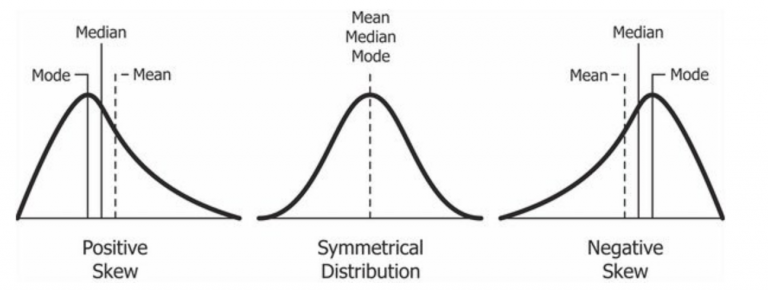


Importance :
linear models work on the assumption that the distribution of the independent variable and the target variable are similar. Therefore, knowing about the skewness of data helps us in creating better linear models.

if the data is positively skewed, then a higher number of data points have lower values -- thus a classification model trained on a positively skewed dataset will better predict lower values compared to higher values

In [36]:
skw = skew(df)
print(f"Skweness: {'%.2f' % skw} ")

Skweness: 0.76 


## Kurtosis

It describes the degree to which a dataset is concentrated towarss the tails or the centers
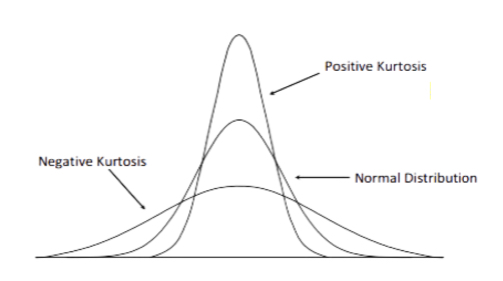

In [37]:
kurto = kurtosis(df)
print(f"Kurtosis: {'%.2f' % kurto}")

Kurtosis: 10.35


# Realtionship Measurements

## Covariance Matrix

how one assest behaves with respect to the other
 - Covariance matrix is always symmetric
 - Diagnols of the matrix are variances of assets
 
 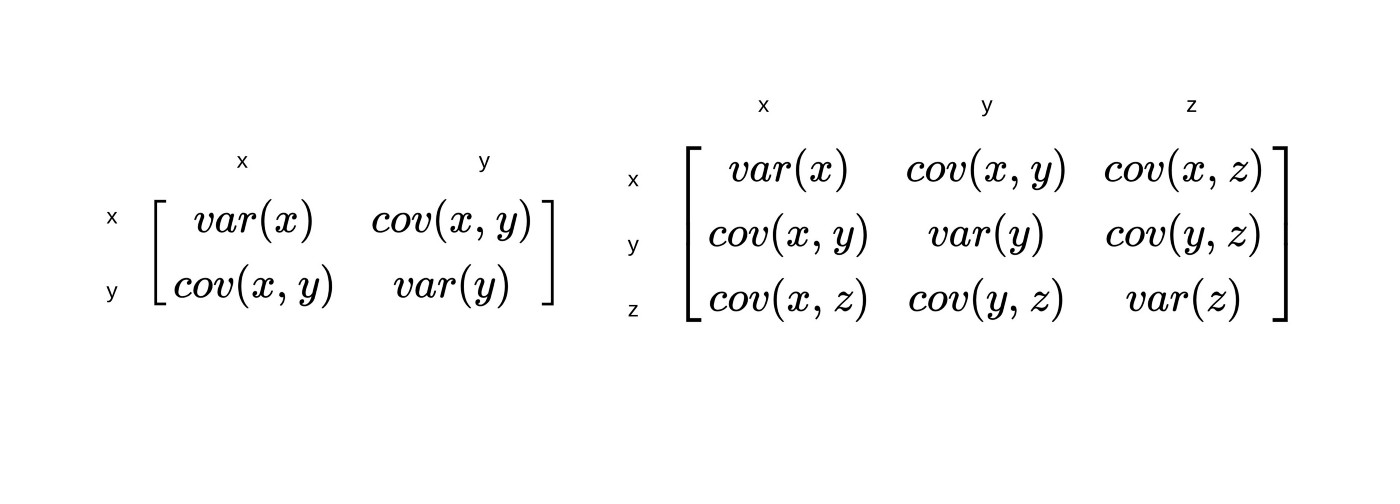

In [48]:
# Import teo assets
df_cov = yf.download(["GOOG", "EURUSD=X"])['Adj Close'].pct_change(1).dropna()
df_cov

[*********************100%***********************]  2 of 2 completed


,EURUSD=X,GOOG
Date,,
2004-08-20,-0.004042,0.079430
2004-08-23,-0.013793,0.010064
2004-08-24,-0.005763,-0.041408
2004-08-25,0.000338,0.010775
2004-08-26,0.001077,0.018019
...,...,...
2022-04-08,-0.003064,-0.017986
2022-04-11,0.001851,-0.031445
2022-04-12,-0.000642,-0.010956


In [50]:
# To find covariance across the columns ,
# we must set the parameter rowvar to False

covariance_matrix = np.cov(df_cov, rowvar=False)
covariance_matrix


array([[5.34627418e-05, 6.71765490e-06],
       [6.71765490e-06, 3.51575136e-04]])

In [52]:
# Extract the covariance between the two assests as:

cov_G_E = covariance_matrix[0][1]
print("The covariance between the assets is :", cov_G_E)

The covariance between the assets is : 6.717654898189001e-06


## Correlation Matrix

It is the standardized version of the covariance and takes values between -1 and 1. A correlation between x and y of 0.65 means that if x goes up, theres a 65% chance of y also going up

- Corraltion must have the data of the same time frame
- We have to use the variantion of the data and not the absolute value

In [ ]:
# Correlation function is used from the pandas library
df_cov.corr